In [1]:
# from mpl_toolkits.basemap import Basemap, cm
import matplotlib.pyplot as plt
import numpy as np
from pyhdf.SD import SD, SDC

dataset = SD('/home/eeb177-student/Desktop/eeb177/eeb-177-final-project/data/2014/3A25.20140101.7.HDF', SDC.READ)

precip = dataset.select("precipitation")
precip = precip[:]
precip = np.transpose(precip)

theLats = np.arange(-49.875,50,0.25)
theLons = np.arange(-179.875,180,0.25)

# set all missing values less than 0 to NA
np.putmask(precip,pecip<0,np.nan)

# plot figure, define geographic boundaries
fig = plt.figure(dpi=300)
latcorners=([-50,50])
loncorner=([-180,180])

m = Basemap(projection='cyl',\
            llcrnrlat=latcorners[0],urcrnrlat=latcorners[1],llcrnrlon=loncorners[0],urcnrlon=loncorners[1])

# Draw coastlines and countries
m.drawcoastlines()
m.drawcountries()

# Draw filles contours
clevs = np.arange(0,5.01,0.5)

# Define lat and lon data
x, y = np.float32(np.meshgrid(theLons, theLats))
cs = m.contour(x,y,precip,clevs,cmap=cm.m.GMT_drywet,latlon=True)

parallels = np.arange(-50.,51,25.)    
m.drawparallels(parallels,labels=[True,False,True,False])
meridians = np.arange(-180.,180.,60.)
m.drawmeridians(meridians,labels=[False,False,False,True])

ImportError: No module named 'pyhdf'

In [34]:
from mpl_toolkits.basemap import Basemap, cm
import matplotlib.pyplot as plt
import numpy as np
import h5py as h5py

dataset = h5py.File('/home/eeb177-student/Desktop/eeb177/eeb-177-final-project/data/2015/3B-MO.MS.MRG.3IMERG.20151201-S000000-E235959.12.V03D.HDF5', 'r') 
# dataset.close()

precip = dataset['Grid/precipitation'][:]
precip = np.transpose(precip)

theLats= dataset['Grid/lat'][:]
theLons = dataset['Grid/lon'][:]

# Plot the figure, define the geographic bounds

fig = plt.figure(dpi=300)
latcorners = ([-60,60])
loncorners = ([-180,180])

m = Basemap(projection='cyl',llcrnrlat=latcorners[0],urcrnrlat=latcorners[1],llcrnrlon=loncorners[0],urcrnrlon=loncorners[1])

# Draw coastlines, state and country boundaries, edge of map.

m.drawcoastlines()
# m.drawstates()
m.drawcountries()

# Draw filled contours.

clevs = np.arange(0,1.26,0.125)

# Define the latitude and longitude data

x, y = (np.meshgrid(theLons, theLats))
#X, Y = np.meshgrid(x,y)
# Mask the values less than 0 because there is no data to plot.
masked_array = np.ma.masked_where(precip < 0,precip)

# Plot every masked value as white
cmap = cm.GMT_drywet
cmap.set_bad('w',1.)

# Plot the data
cs = m.contourf(x,y,precip,clevs,cmap=cmap,latlon=True)
#m.contourf(data = precip, x = X, y = Y)
parallels = np.arange(-60.,61,20.)
m.drawparallels(parallels,labels=[True,False,True,False])
meridians = np.arange(-180.,180.,60.)
m.drawmeridians(meridians,labels=[False,False,False,True])

#Set the title and fonts
plt.title('August 2015 Monthly Average Rain Rate')
font = {'weight' : 'bold', 'size' : 6}
plt.rc('font', **font)

#Add colorbar
cbar = m.colorbar(cs,location='right',pad="5%")
cbar.set_label('mm/h')
plt.show()
# plt.savefig('/home/eeb177-student/Desktop/eeb177/eeb-177-final-project/data/2015/testIMERGmap.png',dpi=200)



/home/eeb177-student/miniconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/eeb177-student/miniconda3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3675: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [10]:
y

array([[-89.94999695, -89.94999695, -89.94999695, ..., -89.94999695,
        -89.94999695, -89.94999695],
       [-89.84999847, -89.84999847, -89.84999847, ..., -89.84999847,
        -89.84999847, -89.84999847],
       [-89.75      , -89.75      , -89.75      , ..., -89.75      ,
        -89.75      , -89.75      ],
       ..., 
       [ 89.75      ,  89.75      ,  89.75      , ...,  89.75      ,
         89.75      ,  89.75      ],
       [ 89.84999847,  89.84999847,  89.84999847, ...,  89.84999847,
         89.84999847,  89.84999847],
       [ 89.94999695,  89.94999695,  89.94999695, ...,  89.94999695,
         89.94999695,  89.94999695]])

In [11]:
np.float32(y)

array([[-89.94999695, -89.94999695, -89.94999695, ..., -89.94999695,
        -89.94999695, -89.94999695],
       [-89.84999847, -89.84999847, -89.84999847, ..., -89.84999847,
        -89.84999847, -89.84999847],
       [-89.75      , -89.75      , -89.75      , ..., -89.75      ,
        -89.75      , -89.75      ],
       ..., 
       [ 89.75      ,  89.75      ,  89.75      , ...,  89.75      ,
         89.75      ,  89.75      ],
       [ 89.84999847,  89.84999847,  89.84999847, ...,  89.84999847,
         89.84999847,  89.84999847],
       [ 89.94999695,  89.94999695,  89.94999695, ...,  89.94999695,
         89.94999695,  89.94999695]], dtype=float32)

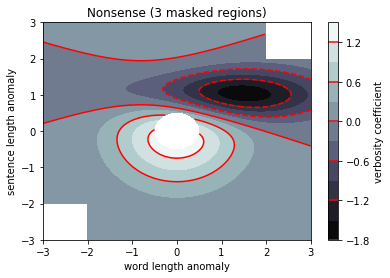

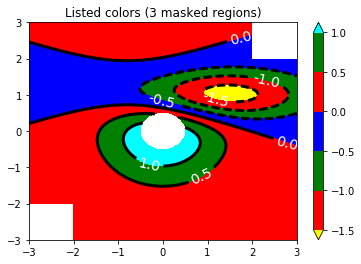

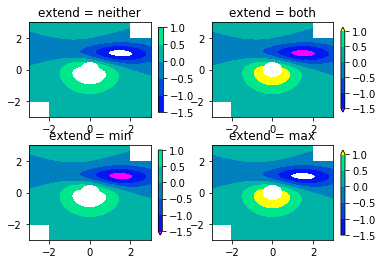

In [18]:
import numpy as np
import matplotlib.pyplot as plt

origin = 'lower'
#origin = 'upper'

delta = 0.025

x1 = y1 = np.arange(-3.0, 3.01, delta)
X1, Y1 = np.meshgrid(x1, y1)
Z1 = plt.mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = plt.mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
Z = 10 * (Z1 - Z2)

nr, nc = Z.shape

# put NaNs in one corner:
Z[-nr//6:, -nc//6:] = np.nan
# contourf will convert these to masked


Z = np.ma.array(Z)
# mask another corner:
Z[:nr//6, :nc//6] = np.ma.masked

# mask a circle in the middle:
interior = np.sqrt((X**2) + (Y**2)) < 0.5
Z[interior] = np.ma.masked

# We are using automatic selection of contour levels;
# this is usually not such a good idea, because they don't
# occur on nice boundaries, but we do it here for purposes
# of illustration.
CS = plt.contourf(X, Y, Z, 10,
                  #[-1, -0.1, 0, 0.1],
                  #alpha=0.5,
                  cmap=plt.cm.bone,
                  origin=origin)

# Note that in the following, we explicitly pass in a subset of
# the contour levels used for the filled contours.  Alternatively,
# We could pass in additional levels to provide extra resolution,
# or leave out the levels kwarg to use all of the original levels.

CS2 = plt.contour(CS, levels=CS.levels[::2],
                  colors='r',
                  origin=origin)

plt.title('Nonsense (3 masked regions)')
plt.xlabel('word length anomaly')
plt.ylabel('sentence length anomaly')

# Make a colorbar for the ContourSet returned by the contourf call.
cbar = plt.colorbar(CS)
cbar.ax.set_ylabel('verbosity coefficient')
# Add the contour line levels to the colorbar
cbar.add_lines(CS2)

plt.figure()

# Now make a contour plot with the levels specified,
# and with the colormap generated automatically from a list
# of colors.
levels = [-1.5, -1, -0.5, 0, 0.5, 1]
CS3 = plt.contourf(X, Y, Z, levels,
                   colors=('r', 'g', 'b'),
                   origin=origin,
                   extend='both')
# Our data range extends outside the range of levels; make
# data below the lowest contour level yellow, and above the
# highest level cyan:
CS3.cmap.set_under('yellow')
CS3.cmap.set_over('cyan')

CS4 = plt.contour(X, Y, Z, levels,
                  colors=('k',),
                  linewidths=(3,),
                  origin=origin)
plt.title('Listed colors (3 masked regions)')
plt.clabel(CS4, fmt='%2.1f', colors='w', fontsize=14)

# Notice that the colorbar command gets all the information it
# needs from the ContourSet object, CS3.
plt.colorbar(CS3)

# Illustrate all 4 possible "extend" settings:
extends = ["neither", "both", "min", "max"]
cmap = plt.cm.get_cmap("winter")
cmap.set_under("magenta")
cmap.set_over("yellow")
# Note: contouring simply excludes masked or nan regions, so
# instead of using the "bad" colormap value for them, it draws
# nothing at all in them.  Therefore the following would have
# no effect:
# cmap.set_bad("red")

fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.3)

for ax, extend in zip(axs.ravel(), extends):
    cs = ax.contourf(X, Y, Z, levels, cmap=cmap, extend=extend, origin=origin)
    fig.colorbar(cs, ax=ax, shrink=0.9)
    ax.set_title("extend = %s" % extend)
    ax.locator_params(nbins=4)

plt.show()


In [23]:
type(Y1)

numpy.ndarray

In [26]:
type(y)

numpy.ndarray

In [31]:
y

array([[-89.94999695, -89.94999695, -89.94999695, ..., -89.94999695,
        -89.94999695, -89.94999695],
       [-89.84999847, -89.84999847, -89.84999847, ..., -89.84999847,
        -89.84999847, -89.84999847],
       [-89.75      , -89.75      , -89.75      , ..., -89.75      ,
        -89.75      , -89.75      ],
       ..., 
       [ 89.75      ,  89.75      ,  89.75      , ...,  89.75      ,
         89.75      ,  89.75      ],
       [ 89.84999847,  89.84999847,  89.84999847, ...,  89.84999847,
         89.84999847,  89.84999847],
       [ 89.94999695,  89.94999695,  89.94999695, ...,  89.94999695,
         89.94999695,  89.94999695]])

In [30]:
Y1


array([[-3.   , -3.   , -3.   , ..., -3.   , -3.   , -3.   ],
       [-2.975, -2.975, -2.975, ..., -2.975, -2.975, -2.975],
       [-2.95 , -2.95 , -2.95 , ..., -2.95 , -2.95 , -2.95 ],
       ..., 
       [ 2.95 ,  2.95 ,  2.95 , ...,  2.95 ,  2.95 ,  2.95 ],
       [ 2.975,  2.975,  2.975, ...,  2.975,  2.975,  2.975],
       [ 3.   ,  3.   ,  3.   , ...,  3.   ,  3.   ,  3.   ]])